In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50=ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files 
up=files.upload()

Saving 개.jpg to 개.jpg


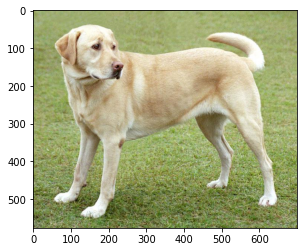

In [6]:
img = Image.open('개.jpg')
plt.imshow(img);

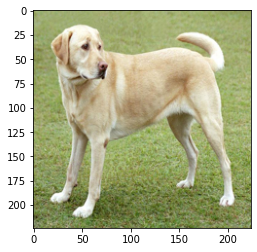

In [7]:
#RES50 은 224*224*3 기준으로 이미지를 처리함
img = img.resize((224,224))
plt.imshow(img);

In [8]:
#이미지 예측
img_array = np.array(img)

In [9]:
yhat = resnet50.predict(img_array.reshape(1,224,224,3))

In [10]:
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02099712', 'Labrador_retriever', 0.20534493),
   ('n02099849', 'Chesapeake_Bay_retriever', 0.14173159),
   ('n02108089', 'boxer', 0.13311695),
   ('n02089867', 'Walker_hound', 0.06211074),
   ('n02104029', 'kuvasz', 0.038029484)]])

In [12]:
yhat[0, :5]

array([1.2560589e-05, 3.6584893e-06, 1.5304813e-05, 4.7918875e-05,
       2.0553123e-05], dtype=float32)

In [14]:
img_class = label[0][0][1]
prob = label[0][0][2]
img_class,prob

('Labrador_retriever', 0.20534493)